鸢尾花

In [27]:
import numpy as np
from sklearn import datasets #自带数据集
from sklearn.model_selection import train_test_split #数据集划分
from sklearn.preprocessing import StandardScaler #标准化
import matplotlib.pyplot as plt

In [24]:
iris=datasets.load_iris()
X,target=iris.data,iris.target #样本数据与样本类别

In [36]:
def model_learn(X,target,arg_model):
    #模型的训练，数据集划分，标准化
    X=StandardScaler().fit_transform(X) #标准化
    random_samples=[] #存储每次随即划分各类别的样本数
    train_precision=[] #训练样本精度
    test_precision=[] #测试样本精度
    for i in range(100):
        #100次随即划分
        #数据集划分：20%的测试集，80%训练集，采用分层采样
        X_train,X_test,y_train,y_test=train_test_split(X,target,test_size=0.2,random_state=i,shuffle=True, stratify=target)
        random_samples.append([len(y_test[y_test==0]),len(y_test[y_test==1]),len(y_test[y_test==2])])
        
        #多分类训练与测试
        model=arg_model() #创建模型实例
        model.fit(X_train,y_train) #训练样本
        y_train_pred=model.predict(X_train) #训练样本预测，经验误差
        y_test_pred=model.predict(X_test) #训练样本预测，泛化误差
        
        train_correct=0
        for j,y in enumerate(y_train_pred):
            if y==y_train[j]:
                train_correct+=1
        train_precision.append(train_correct/len(y_train))
        
        test_correct=0
        for j,y in enumerate(y_test_pred):
            if y==y_test[j]:
                test_correct+=1
        test_precision.append(test_correct/len(y_test))
        
    print("100次随机划分+分层采样，训练样本精度是：%.5f"%(np.mean(train_precision)))
    print("100次随机划分+分层采样，测试样本精度是：%.5f"%(np.mean(test_precision)))
    return train_precision,test_precision

In [39]:
def plt_precision(train_precision,test_precision):
    #绘制100次训练样本精度图像和测试样本精度图像
    fig,ax=plt.subplots(1,2,figsize=(12,4))
    ax[0].plot(train_precision,'.-')
    ax[0].set_title("mean of train_precision={:.5f}".format(np.mean(train_precision)))
    ax[0].set_xlabel("random split number")
    ax[0].set_ylabel("train_precision")
    ax[0].grid()
    
    ax[1].plot(test_precision,'r.-')
    ax[1].set_title("mean of test_precision={:.5f}".format(np.mean(test_precision)))
    ax[1].set_xlabel("random split number")
    ax[1].set_ylabel("test_precision")
    ax[1].grid()

100次随机划分+分层采样，训练样本精度是：0.96892
100次随机划分+分层采样，测试样本精度是：0.95567


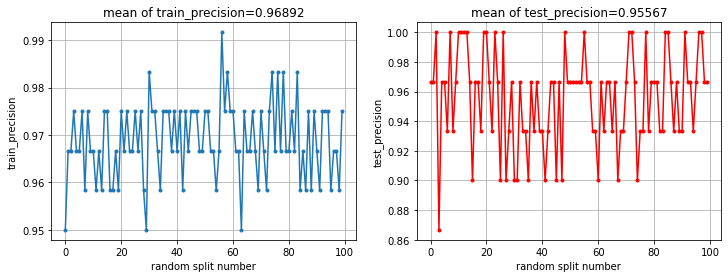

In [46]:
#逻辑回归
from sklearn.linear_model import LogisticRegression
train_precision,test_precision=model_learn(X,target,LogisticRegression)
plt_precision(train_precision,test_precision)

100次随机划分+分层采样，训练样本精度是：1.00000
100次随机划分+分层采样，测试样本精度是：0.95067


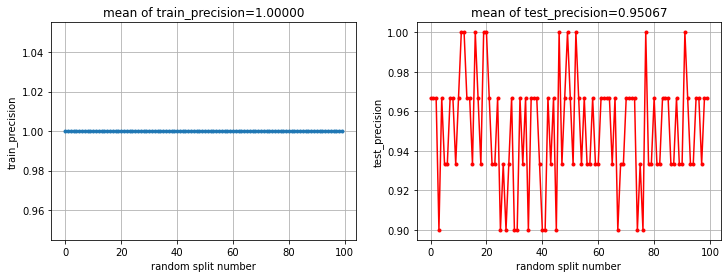

In [47]:
#决策树
from sklearn.tree import DecisionTreeClassifier
train_precision,test_precision=model_learn(X,target,DecisionTreeClassifier)
plt_precision(train_precision,test_precision)

100次随机划分+分层采样，训练样本精度是：0.96167
100次随机划分+分层采样，测试样本精度是：0.95300


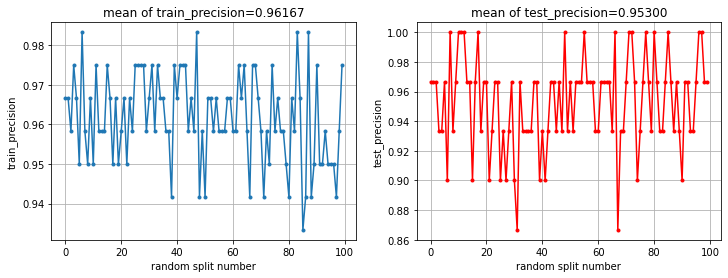

In [48]:
#K近邻法
from sklearn.neighbors import KNeighborsClassifier
train_precision,test_precision=model_learn(X,target,KNeighborsClassifier)
plt_precision(train_precision,test_precision)

100次随机划分+分层采样，训练样本精度是：0.97517
100次随机划分+分层采样，测试样本精度是：0.96300


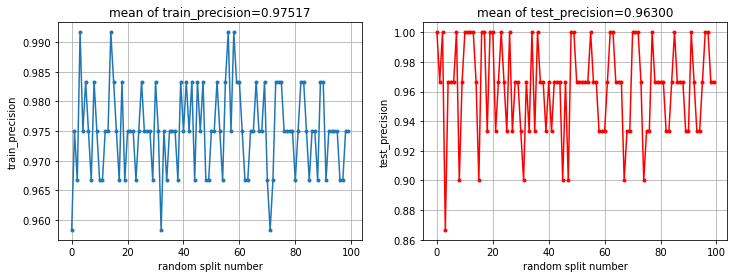

In [49]:
#支持向量机
from sklearn.svm import SVC
train_precision,test_precision=model_learn(X,target,SVC)
plt_precision(train_precision,test_precision)